<a href="https://colab.research.google.com/github/oleg61/DataScient/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%BF%D0%BE_%D0%BA%D1%83%D1%80%D1%81%D1%83_%22Python_%D0%B4%D0%BB%D1%8F_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1 satisfaction_level - Уровень удовлетворенности работой
2 Last_evaluation - Время с момента последней оценки в годах
3 number_projects - Количество проектов, выполненных за время работы
4 average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5 time_spend_company - Стаж работы в компании в годах
6 work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7 left - уволился ли сотрудник
8 promotion_last_5years - повышался ли сотрудник за последние пять лет
9 department - отдел в котором работает сотрудник
10 salary - относительный уровень зарплаты
Требуется выполнить следующее задание:

1. Загрузите файл HR.csv в pandas dataframe.
2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.
4. Рассчитайте сколько сотрудников работает в каждом
департаменте.
5. Показать распределение сотрудников по зарплатам.
6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности.
7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом.
8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов
9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Задание 1.
Загрузите файл HR.csv в pandas dataframe

In [10]:
df = pd.read_csv('HR.csv', sep=',')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Задание 2.
Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [11]:
# Рассчитайте основные статистики для переменных
statistics = df.describe(include='all')

# Рассчитайте моду для каждого столбца
modes = df.mode().loc[0]

statistics.loc['mode'] = modes

print(statistics)

        satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
25%               0.440000         0.560000        3.000000   
50%               0.640000         0.720000        4.000000   
75%               0.820000         0.870000        5.000000   
max               1.000000         1.000000        7.000000   
mode              0.100000         0.550000        4.000000   

        average_montly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
unique            

In [15]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [16]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


# Задание 3.
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [17]:
df_correl = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]
df_correl.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


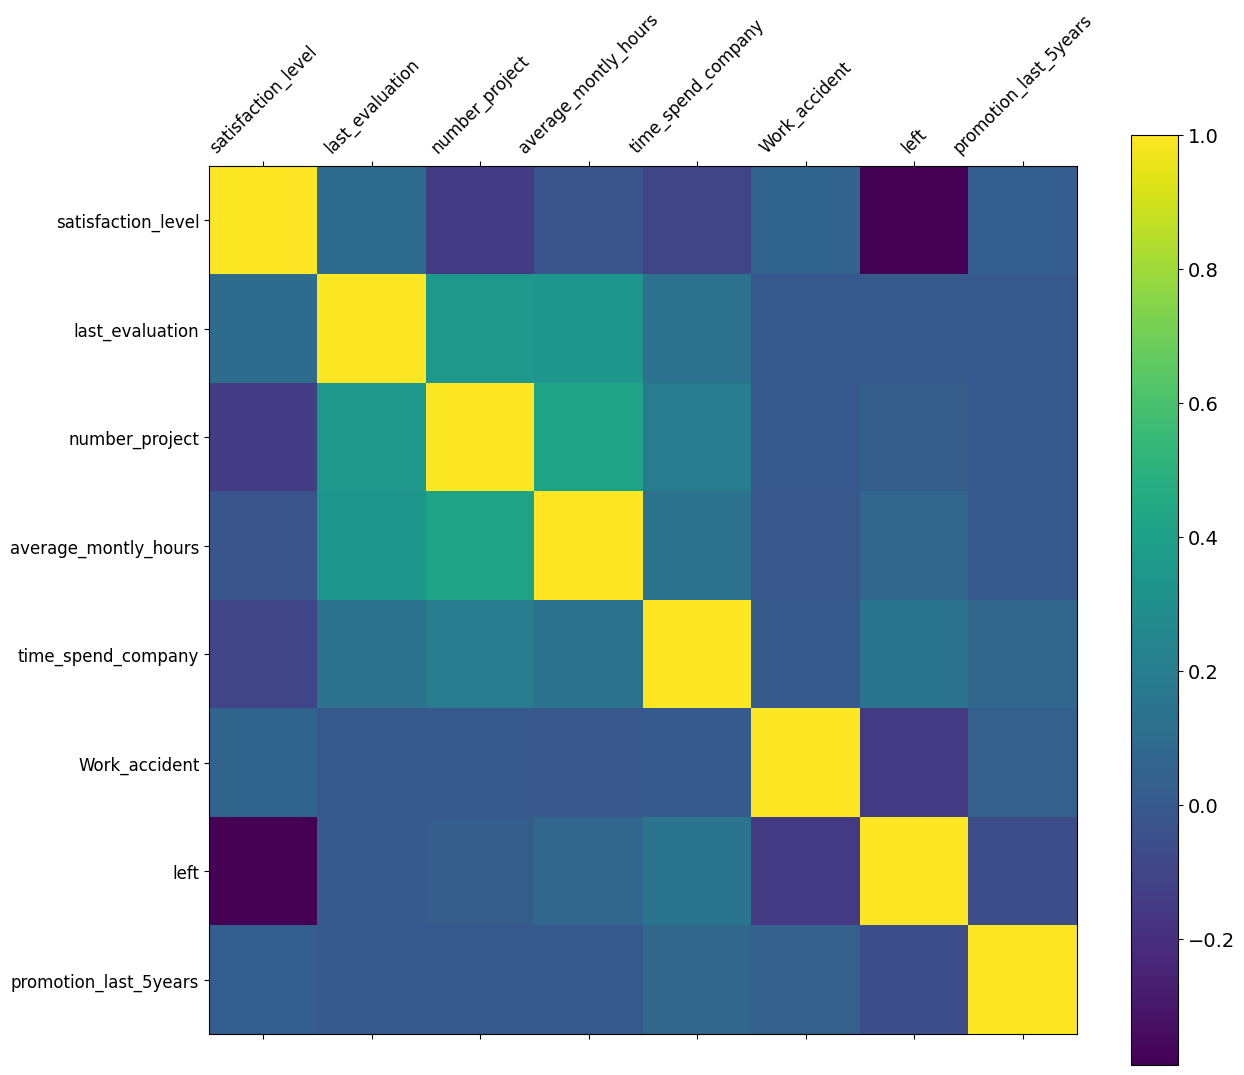

In [19]:
f = plt.figure(figsize=(14, 12))
plt.matshow(df_correl.corr(), fignum=f.number)
plt.xticks(range(df_correl.shape[1]), df_correl.columns, fontsize=12, rotation=45)
plt.yticks(range(df_correl.shape[1]), df_correl.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

**Самые скоррелированные:**

average_montly_hours и number_project

last_evaluation и number_project

**Менее скоррелированные:**

left и satisfaction_level
left и Work_accident

# Задание 4.
Рассчитайте сколько сотрудников работает в каждом департаменте.

In [20]:
df.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

# Задание 5
Показать распределение сотрудников по зарплатам

<Axes: ylabel='salary'>

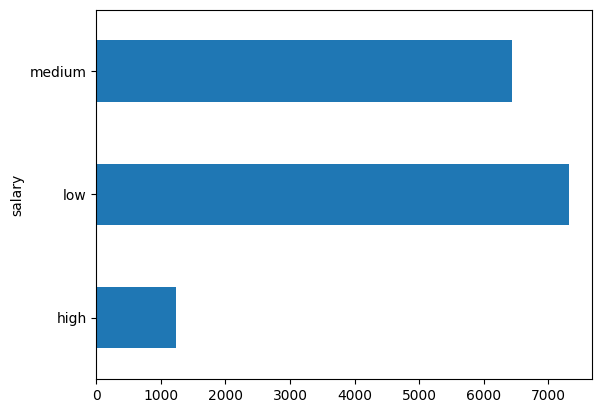

In [21]:
df.groupby('salary')['salary'].count().plot(kind="barh")

# Задание 6.
Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности.

In [22]:
df_rasp = df.groupby([df['department'],df['salary']])[['salary']].count()
df_rasp

salary
department  salary        
IT          high        83
            low        609
            medium     535
RandD       high        51
            low        364
            medium     372
accounting  high        74
            low        358
            medium     335
hr          high        45
            low        335
            medium     359
management  high       225
            low        180
            medium     225
marketing   high        80
            low        402
            medium     376
product_mng high        68
            low        451
            medium     383
sales       high       269
            low       2099
            medium    1772
support     high       141
            low       1146
            medium     942
technical   high       201
            low       1372
            medium    1147

from matplotlib import pyplot as plt
df_rasp['salary'].plot(kind='hist', bins=20, title='salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_rasp['salary'].plot(kind='line', figsize=(8, 4), title='salary')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: ylabel='department,salary'>

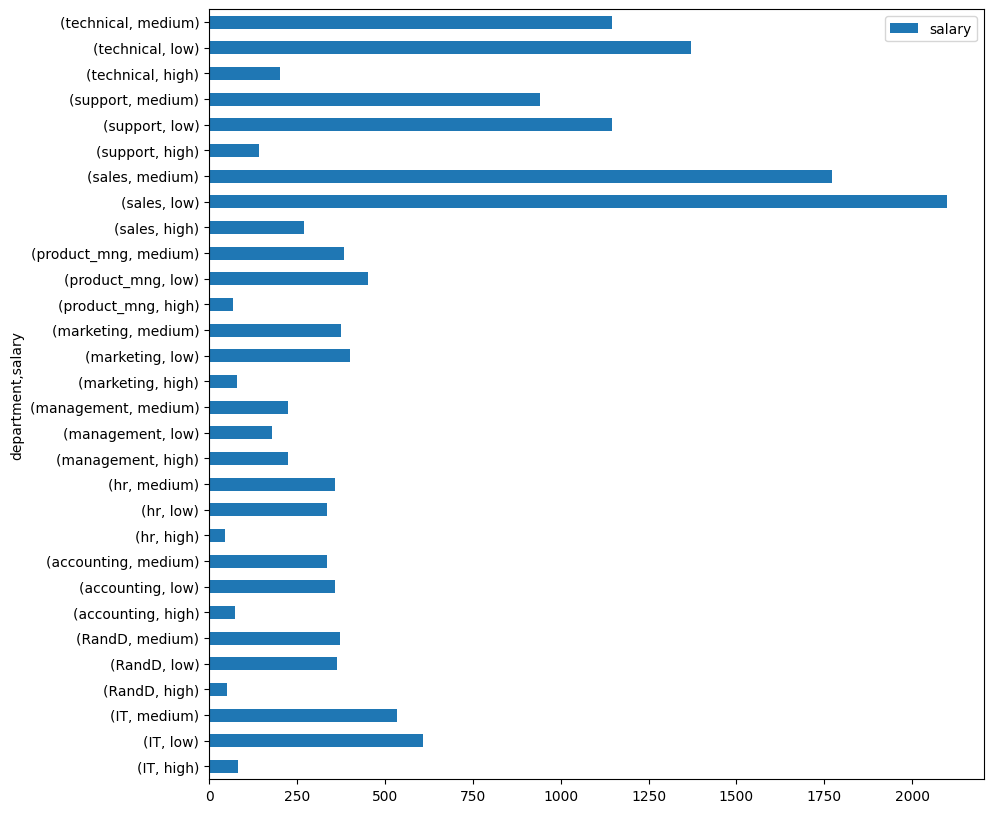

In [24]:
df_rasp.plot(kind="barh",figsize=(10,10))

# Задание 7.
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

In [26]:
df_high = list(df.loc[df['salary'] == 'high']['average_montly_hours'])

In [27]:
df_low = list(df.loc[df['salary'] == 'low']['average_montly_hours'])

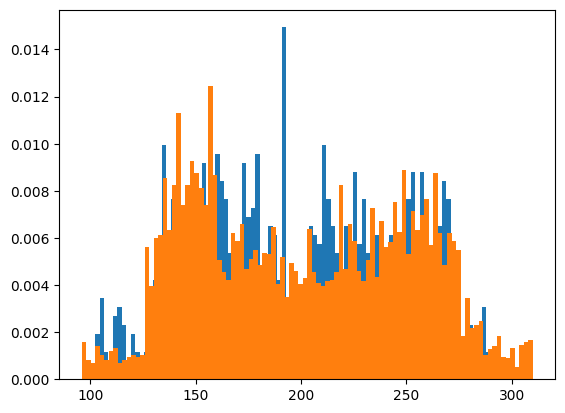

In [28]:
plt.hist(df_high, bins=100, density=True);
plt.hist(df_low, bins=100, density=True);

Из графика видно, что особой разницы нет

In [29]:
t, p = stats.ttest_ind(df_high, df_low)
print(t, p)

-0.7288680398062308 0.4661023478267259


При уровне значимости 0.05 p больше - т.е. гипотеза не верна - оклад не влияет на рабочее время.

# Задание 8.
Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

In [30]:
df_left = df.loc[df['left'] == 1]
df_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [31]:
len(df_left.loc[df_left['promotion_last_5years'] == 1])/len(df_left)

0.005320638476617194

In [32]:
df_left['satisfaction_level'].mean()

0.4400980117614114

In [33]:
df_left['number_project'].mean()

3.8555026603192384

In [34]:
df_noleft = df.loc[df['left'] == 0]
df_noleft.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [35]:
len(df_noleft.loc[df_noleft['promotion_last_5years'] == 1])/len(df_noleft)

0.026251312565628283

In [36]:
df_noleft['satisfaction_level'].mean()

0.666809590479524

In [37]:
df_noleft['number_project'].mean()

3.786664333216661

# Задание 9.
Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки.

In [40]:
left = pd.array(df_correl['left'])

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_correl[['satisfaction_level','last_evaluation','number_project',
                                                            'average_montly_hours','time_spend_company','Work_accident',
                                                            'promotion_last_5years']], left, test_size=0.20)

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [44]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [45]:
results = pd.DataFrame([y_test, lda.predict(X_test)]).T
results

,0,1
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
2995,0,1
2996,0,0
2997,0,0
2998,0,0


In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7606666666666667

исходя из п.3 у нас мало какие факторы влияют на увольнение сотрудников, не удивительно, что не 100% попадание